# Video Games Challenge - Part 2: Analysis
You are a data scientist in the video game edition business, and you are asked to identify which factors, and combinations of factors, make a game successful (both critically and commercially). Possible sources: IGN, Steam, GameSpot..

## Read dataset

In [1]:
# import librairies
import pandas as pd

In [4]:
# read csv file as a pandas data frame
df = pd.read_csv("Steam_dataset.csv")
# add index_col=0 to have a single index (and not a duplication)

In [7]:
df.head()

,game_id,Name,year,type,User_review,Number of reviews,Release_date,Language,Tags,Price,...,Historical,Building,Walking Simulator,World War I,Economy,Horror,Remake,Chinese,Spanish,Arabic
0,570,Dota 2,2018,Platinum,Very Positive,1058771,"9 Jul, 2013","['English', 'Bulgarian', 'Czech', 'Danish', 'D...","['Free to Play', 'MOBA', 'Multiplayer', 'Strat...",0.00,...,False,False,False,False,False,False,False,True,True,False
1,289070,Sid Meier’s Civilization® VI,2018,Platinum,Mixed,42471,"20 Oct, 2016","['English', 'French', 'Italian', 'German', 'Sp...","['Strategy', 'Turn-Based Strategy', 'Historica...",69.95,...,True,True,False,False,False,False,False,True,True,False
2,730,Counter-Strike: Global Offensive,2018,Platinum,Very Positive,3304339,"21 Aug, 2012","['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...",0.00,...,False,False,False,False,False,False,False,True,True,False
3,306130,The Elder Scrolls® Online,2018,Platinum,Mostly Positive,41274,"4 Apr, 2014","['English', 'French', 'German']","['RPG', 'MMORPG', 'Open World', 'Massively Mul...",23.90,...,False,False,False,False,False,False,False,False,False,False
4,252950,Rocket League®,2018,Platinum,Very Positive,215037,"7 Jul, 2015","['English', 'French', 'Italian', 'German', 'Sp...","['Multiplayer', 'Soccer', 'Competitive', 'Spor...",19.00,...,False,False,False,False,False,False,False,False,True,False


In [128]:
# define subdataframes
filter_sellers_2018 = (df['year'] == 2018) & ((df['type'] == 'Platinum') | (df['type'] == 'Gold') | (df['type'] == 'Silver') | (df['type'] == 'Bronze'))
filter_sellers_2017 = (df['year'] == 2017) & ((df['type'] == 'Platinum') | (df['type'] == 'Gold') | (df['type'] == 'Silver') | (df['type'] == 'Bronze'))
filter_sellers_2016 = (df['year'] == 2016) & ((df['type'] == 'Platinum') | (df['type'] == 'Gold') | (df['type'] == 'Silver') | (df['type'] == 'Bronze'))
filter_played_2018 = (df['year'] == 2018) & ((df['type'] == 'Over 100,000 Simultaneous Players') | (df['type'] == 'Over 50,000 Simultaneous Players')| (df['type'] == 'Over 25,000 Simultaneous Players')|(df['type'] == 'Over 15,000 Simultaneous Players'))
filter_played_2017 = (df['year'] == 2018) & ((df['type'] == 'Over 100,000 Simultaneous Players') | (df['type'] == 'Over 50,000 Simultaneous Players')| (df['type'] == 'Over 25,000 Simultaneous Players')|(df['type'] == 'Over 15,000 Simultaneous Players'))

In [129]:
df_sellers_2018 = df[filter_sellers_2018]
df_played_2018 = df[filter_played_2018]
df_sellers_2017 = df[filter_sellers_2017]
df_played_2017 = df[filter_played_2017]
df_sellers_2016 = df[filter_sellers_2016]

## Tags

### define tags

In [44]:
tags_list = ['Epic',
 'Hardware',
 'Military',
 'Perma Death',
 'Soccer',
 'Mature',
 'Fast-Paced',
 'Anime',
 'Lovecraftian',
 'Psychological',
 'Mars',
 'Agriculture',
 'Mystery',
 '4 Player Local',
 'Diplomacy',
 'Gothic',
 'Masterpiece',
 '3D Platformer',
 'Dungeons & Dragons',
 'Music',
 'Basketball',
 'Rogue-like',
 'Psychological Horror',
 'Spectacle fighter',
 'Hex Grid',
 'Puzzle-Platformer',
 'Co-op',
 'Realistic',
 'Point & Click',
 'Singleplayer',
 'Violent',
 'Cinematic',
 'Underwater',
 'Procedural Generation',
 'Hacking',
 'Platformer',
 'Team-Based',
 'Hack and Slash',
 'Fantasy',
 'Puzzle',
 'Dog',
 'Dark',
 'Post-apocalyptic',
 "Beat 'em up",
 'Class-Based',
 'Transhumanism',
 'Political',
 'Lore-Rich',
 '2.5D',
 'Loot',
 'Cold War',
 'Split Screen',
 'Score Attack',
 'Pirates',
 'Robots',
 'Twin Stick Shooter',
 '2D Fighter',
 'FPS',
 'Story Rich',
 'Science',
 'Female Protagonist',
 'Pixel Graphics',
 'Martial Arts',
 'Real-Time with Pause',
 'Local Co-Op',
 'VR',
 'Steampunk',
 'Heist',
 'Zombies',
 'Assassin',
 'Hand-drawn',
 'Controller',
 'Third-Person Shooter',
 'Blood',
 'Rome',
 'Cartoon',
 'Animation & Modeling',
 'Supernatural',
 'Beautiful',
 'Real Time Tactics',
 'Colorful',
 'Simulation',
 'Education',
 'Games Workshop',
 'Difficult',
 'Side Scroller',
 'Voxel',
 'Cartoony',
 'Quick-Time Events',
 'Competitive',
 'Swordplay',
 'Old School',
 'Arena Shooter',
 'Dystopian',
 'Action RPG',
 'Trading Card Game',
 'Atmospheric',
 'Sniper',
 'Lara Croft',
 'Shooter',
 'Action-Adventure',
 'Real-Time',
 'Touch-Friendly',
 'Racing',
 'Parody',
 'Based On A Novel',
 "Shoot 'Em Up",
 'Nudity',
 'Tanks',
 'Party-Based RPG',
 'Horses',
 'MMORPG',
 'Sandbox',
 'Illuminati',
 'Politics',
 'Warhammer 40K',
 'First-Person',
 'Modern',
 'War',
 'Visual Novel',
 'Trains',
 'Time Travel',
 'World War II',
 'Turn-Based Strategy',
 'TrackIR',
 'JRPG',
 'Classic',
 'Satire',
 'Fighting',
 'Bullet Hell',
 'City Builder',
 'Open World',
 'Design & Illustration',
 'Western',
 'Demons',
 'LGBTQ+',
 'Survival',
 'Superhero',
 'Choose Your Own Adventure',
 'Arcade',
 '3D Vision',
 'Grand Strategy',
 'Casual',
 'Local Multiplayer',
 'Strategy',
 'Funny',
 'Hunting',
 'PvE',
 'Inventory Management',
 'Driving',
 'Souls-like',
 'Isometric',
 'Crafting',
 'Great Soundtrack',
 'Third Person',
 'Multiple Endings',
 'Gambling',
 'MOBA',
 'Stylized',
 'Kickstarter',
 '1980s',
 'Utilities',
 'Vampire',
 'Romance',
 'Dark Humor',
 'Conspiracy',
 'Football',
 'Short',
 'Survival Horror',
 'Dating Sim',
 'Multiplayer',
 'Relaxing',
 '4X',
 'Massively Multiplayer',
 'eSports',
 'Trading',
 "1990's",
 'Mechs',
 'Stealth',
 '2D',
 'Management',
 'Medieval',
 'Space Sim',
 'Free to Play',
 'Thriller',
 'Physics',
 'Aliens',
 'Top-Down',
 'Sexual Content',
 'Time Manipulation',
 'Automation',
 'Adventure',
 'Magic',
 'Tactical',
 'Base Building',
 'Tower Defense',
 'Drama',
 'Turn-Based Combat',
 'Clicker',
 'CRPG',
 'Parkour',
 'Choices Matter',
 'Turn-Based',
 'Space',
 'Retro',
 'Comedy',
 'Battle Royale',
 'Gun Customization',
 'Flight',
 'Dark Fantasy',
 'Mouse only',
 'Indie',
 'Dragons',
 'Sports',
 'Linear',
 'Action',
 'Alternate History',
 'Exploration',
 'Dinosaurs',
 'Naval',
 'Ninja',
 'Fishing',
 'Sci-fi',
 'Crowdfunded',
 'Crime',
 'Episodic',
 'Rogue-lite',
 'Mod',
 'Early Access',
 'Character Action Game',
 'Family Friendly',
 'PvP',
 'Moddable',
 'Futuristic',
 'Turn-Based Tactics',
 'RTS',
 'Cyberpunk',
 'Mythology',
 'Steam Machine',
 'Dungeon Crawler',
 'Destruction',
 'Online Co-Op',
 'Level Editor',
 'America',
 'Resource Management',
 'Card Game',
 'RPG',
 'Memes',
 'Top-Down Shooter',
 'Replay Value',
 'Addictive',
 'Metroidvania',
 'Character Customization',
 'Cute',
 'Software',
 'Gore',
 'Immersive Sim',
 'Historical',
 'Building',
 'Walking Simulator',
 'World War I',
 'Economy',
 'Horror',
 'Remake']

### Get the top tags

In [130]:
count_tags_sellers_2018=df_sellers_2018[tags_list].apply(pd.value_counts,axis=0)
count_tags_sellers_2017=df_sellers_2017[tags_list].apply(pd.value_counts,axis=0)
count_tags_played_2018=df_played_2018[tags_list].apply(pd.value_counts,axis=0)
count_tags_played_2017=df_played_2017[tags_list].apply(pd.value_counts,axis=0)
count_tags_sellers_2016=df_sellers_2016[tags_list].apply(pd.value_counts,axis=0)

In [131]:
count_tags_sellers_2018 = count_tags_sellers_2018.T
count_tags_sellers_2017 = count_tags_sellers_2017.T
count_tags_sellers_2016 = count_tags_sellers_2016.T
count_tags_played_2018 = count_tags_played_2018.T
count_tags_played_2017 = count_tags_played_2017.T

In [132]:
count_tags_sellers_2018_true = count_tags_sellers_2018[1]
count_tags_sellers_2017_true = count_tags_sellers_2017[1]
count_tags_sellers_2016_true = count_tags_sellers_2016[1]
count_tags_played_2018_true = count_tags_played_2018[1]
count_tags_played_2017_true = count_tags_played_2017[1]

In [133]:
top = 20

In [134]:
top_tags_sellers_2018 = count_tags_sellers_2018_true.sort_values(ascending=False).head(top)
top_tags_sellers_2017 = count_tags_sellers_2017_true.sort_values(ascending=False).head(top)
top_tags_sellers_2016 = count_tags_sellers_2016_true.sort_values(ascending=False).head(top)
top_tags_played_2018 = count_tags_played_2018_true.sort_values(ascending=False).head(top)
top_tags_played_2017 = count_tags_played_2017_true.sort_values(ascending=False).head(top)

In [135]:
top_tags_sellers_2018  = pd.DataFrame({'tag':top_tags_sellers_2018.index,'count':top_tags_sellers_2018.values})
top_tags_sellers_2017  = pd.DataFrame({'tag':top_tags_sellers_2017.index,'count':top_tags_sellers_2017.values})
top_tags_sellers_2016  = pd.DataFrame({'tag':top_tags_sellers_2016.index,'count':top_tags_sellers_2016.values})
top_tags_played_2018  = pd.DataFrame({'tag':top_tags_played_2018.index,'count':top_tags_played_2018.values})
top_tags_played_2017  = pd.DataFrame({'tag':top_tags_played_2017.index,'count':top_tags_played_2017.values})

In [158]:
top_tags_played_2018

,tag,count
0,Multiplayer,94.0
1,Singleplayer,93.0
2,Action,87.0
3,Co-op,70.0
4,Open World,68.0
5,Adventure,64.0
6,Strategy,54.0
7,Atmospheric,51.0
8,RPG,49.0
9,Great Soundtrack,47.0


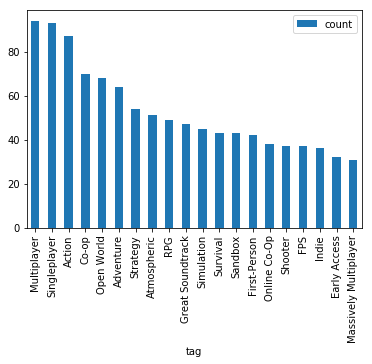

In [156]:
top_tags_played_2018.plot(x = 'tag', y = 'count', kind = 'bar')
None

## Get the top languages

In [91]:
list_languages = ['English',
 'Bulgarian',
 'Czech',
 'Danish',
 'Dutch',
 'Finnish',
 'French',
 'German',
 'Greek',
 'Hungarian',
 'Italian',
 'Japanese',
 'Korean',
 'Norwegian',
 'Polish',
 'Portuguese',
 'Portuguese',
 'Romanian',
 'Russian',
 'Chinese',
 'Spanish',
 'Swedish',
 'Thai',
 'Turkish',
 'Ukrainian',
 'Arabic']

In [148]:
count_l_sellers_2018=df_sellers_2018[list_languages].apply(pd.value_counts,axis=0)
count_l_sellers_2017=df_sellers_2017[list_languages].apply(pd.value_counts,axis=0)
count_l_played_2018=df_played_2018[list_languages].apply(pd.value_counts,axis=0)
count_l_played_2017=df_played_2017[list_languages].apply(pd.value_counts,axis=0)
count_l_sellers_2016=df_sellers_2016[list_languages].apply(pd.value_counts,axis=0)

In [149]:
count_l_sellers_2018 = count_l_sellers_2018.T
count_l_sellers_2017 = count_l_sellers_2017.T
count_l_sellers_2016 = count_l_sellers_2016.T
count_l_played_2018 = count_l_played_2018.T
count_l_played_2017 = count_l_played_2017.T

In [150]:
count_l_sellers_2018_true = count_l_sellers_2018[1]
count_l_sellers_2017_true = count_l_sellers_2017[1]
count_l_sellers_2016_true = count_l_sellers_2016[1]
count_l_played_2018_true = count_l_played_2018[1]
count_l_played_2017_true = count_l_played_2017[1]

In [151]:
top_l_sellers_2018 = count_l_sellers_2018_true.sort_values(ascending=False).head(top)
top_l_sellers_2017 = count_l_sellers_2017_true.sort_values(ascending=False).head(top)
top_l_sellers_2016 = count_l_sellers_2016_true.sort_values(ascending=False).head(top)
top_l_played_2018 = count_l_played_2018_true.sort_values(ascending=False).head(top)
top_l_played_2017 = count_l_played_2017_true.sort_values(ascending=False).head(top)

In [152]:
top_l_sellers_2018  = pd.DataFrame({'language':top_l_sellers_2018.index,'count':top_l_sellers_2018.values})
top_l_sellers_2017  = pd.DataFrame({'language':top_l_sellers_2017.index,'count':top_l_sellers_2017.values})
top_l_sellers_2016  = pd.DataFrame({'language':top_l_sellers_2016.index,'count':top_l_sellers_2016.values})
top_l_played_2018  = pd.DataFrame({'language':top_l_played_2018.index,'count':top_l_played_2018.values})
top_l_played_2017  = pd.DataFrame({'language':top_l_played_2017.index,'count':top_l_played_2017.values})

In [153]:
top_l_sellers_2018

,language,count
0,English,100.0
1,German,99.0
2,French,98.0
3,Spanish,95.0
4,Russian,88.0
5,Chinese,85.0
6,Italian,82.0
7,Portuguese,77.0
8,Portuguese,77.0
9,Polish,74.0


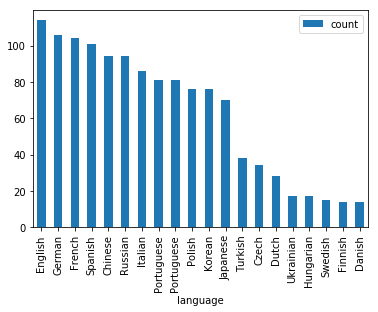

In [157]:
top_l_played_2018.plot(x = 'language', y = 'count', kind = 'bar')
None